In [104]:
#import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn

%matplotlib inline                                        
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import tree

In [105]:
#importing the file

filename= "datasets/DC_Properties.csv"
df = pd.read_csv(filename)
df

C:\Users\carbo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
5,5,3,2,Hot Water Rad,Y,1.0,10,5,1913.0,NaN,...,-77.039715,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
6,6,1,0,Warm Cool,Y,2.0,5,2,1917.0,1988.0,...,-77.041055,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW
7,7,3,1,Hot Water Rad,Y,2.0,8,4,1906.0,2011.0,...,-77.040129,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW
8,8,3,1,Warm Cool,Y,2.0,7,3,1908.0,2008.0,...,-77.039903,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW
9,9,1,1,Hot Water Rad,Y,1.0,6,2,1908.0,1979.0,...,-77.040081,Old City 2,040 D Old City 2,4201.0,004201 2005,Ward 2,152,-77.040429,38.914881,NW


In [106]:
#Looking for duplicates
dupe = df.duplicated()

In [107]:
df.loc[dupe]


,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT


In [108]:
#These are all the columns
df.columns

Index(['Unnamed: 0', 'BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS',
       'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'PRICE',
       'QUALIFIED', 'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE',
       'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES',
       'USECODE', 'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'CMPLX_NUM',
       'LIVING_GBA', 'FULLADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'NATIONALGRID',
       'LATITUDE', 'LONGITUDE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD',
       'CENSUS_TRACT', 'CENSUS_BLOCK', 'WARD', 'SQUARE', 'X', 'Y', 'QUADRANT'],
      dtype='object')

In [109]:
df.dtypes

Unnamed: 0              int64
BATHRM                  int64
HF_BATHRM               int64
HEAT                   object
AC                     object
NUM_UNITS             float64
ROOMS                   int64
BEDRM                   int64
AYB                   float64
YR_RMDL               float64
EYB                     int64
STORIES               float64
SALEDATE               object
PRICE                 float64
QUALIFIED              object
SALE_NUM                int64
GBA                   float64
BLDG_NUM                int64
STYLE                  object
STRUCT                 object
GRADE                  object
CNDTN                  object
EXTWALL                object
ROOF                   object
INTWALL                object
KITCHENS              float64
FIREPLACES              int64
USECODE                 int64
LANDAREA                int64
GIS_LAST_MOD_DTTM      object
SOURCE                 object
CMPLX_NUM             float64
LIVING_GBA            float64
FULLADDRES

Creating a Smaller dataSet with less columns

In [110]:
#create a new dataFrame with bedrooms, bathrooms, price, year, year remodeled, city, state, zipcode, heat, ac, stories, style
df_new = df[['ZIPCODE', 'STORIES', 'AYB', 'YR_RMDL', 'CNDTN','BEDRM', 'BATHRM', 'HEAT', 'AC' , 'PRICE']]   

In [111]:
df_new.head(100)


,ZIPCODE,STORIES,AYB,YR_RMDL,CNDTN,BEDRM,BATHRM,HEAT,AC,PRICE
0,20009.0,3.0,1910.0,1988.0,Good,4,4,Warm Cool,Y,1095000.0
1,20009.0,3.0,1898.0,2007.0,Good,5,3,Warm Cool,Y,NaN
2,20009.0,3.0,1910.0,2009.0,Very Good,5,3,Hot Water Rad,Y,2100000.0
3,20009.0,3.0,1900.0,2003.0,Good,5,3,Hot Water Rad,Y,1602000.0
4,20009.0,3.0,1913.0,2012.0,Good,3,2,Warm Cool,Y,NaN
5,20009.0,4.0,1913.0,NaN,Good,5,3,Hot Water Rad,Y,1950000.0
6,20009.0,2.0,1917.0,1988.0,Average,2,1,Warm Cool,Y,NaN
7,20009.0,3.0,1906.0,2011.0,Average,4,3,Hot Water Rad,Y,1050000.0
8,20009.0,2.0,1908.0,2008.0,Very Good,3,3,Warm Cool,Y,1430000.0
9,20009.0,2.0,1908.0,1979.0,Average,2,1,Hot Water Rad,Y,NaN


In [112]:
#Checking that each column has the right type
df_new.dtypes

ZIPCODE    float64
STORIES    float64
AYB        float64
YR_RMDL    float64
CNDTN       object
BEDRM        int64
BATHRM       int64
HEAT        object
AC          object
PRICE      float64
dtype: object

In [113]:
#find out missing values per columns
df_new.isnull().sum()   

ZIPCODE        1
STORIES    52305
AYB          271
YR_RMDL    78029
CNDTN      52261
BEDRM          0
BATHRM         0
HEAT           0
AC             0
PRICE      60741
dtype: int64

# Cleaning out the Data

In [114]:
#Looking for missing zipcode, using original Data Frame since it contains the address
missing_zip=df_new.loc[df_new['ZIPCODE'].isnull()]
missing_zip.head()

,ZIPCODE,STORIES,AYB,YR_RMDL,CNDTN,BEDRM,BATHRM,HEAT,AC,PRICE
104610,NaN,2.0,1938.0,NaN,Average,4,2,Hot Water Rad,N,NaN


In [115]:
#Getting the index numbers of rows with missing zipcode
mals= list(missing_zip.index)
mals

[104610]

In [116]:
#looking for rows with missing data under in the price row
missing_price=df_new.loc[df_new['PRICE'].isnull()]
missing_price.head()

,ZIPCODE,STORIES,AYB,YR_RMDL,CNDTN,BEDRM,BATHRM,HEAT,AC,PRICE
1,20009.0,3.0,1898.0,2007.0,Good,5,3,Warm Cool,Y,NaN
4,20009.0,3.0,1913.0,2012.0,Good,3,2,Warm Cool,Y,NaN
6,20009.0,2.0,1917.0,1988.0,Average,2,1,Warm Cool,Y,NaN
9,20009.0,2.0,1908.0,1979.0,Average,2,1,Hot Water Rad,Y,NaN
10,20009.0,3.0,1890.0,1950.0,Fair,5,3,Forced Air,N,NaN


In [117]:
#Getting the index numbers of rows with missing prices
mals= list(missing_price.index)

In [118]:
#Define bins as 1700-1799, 1800-1899, 1900-1949, 1949-1999, 2000-2009, 2010-2017, add a heatmap? 
bins = [1700, 1800, 1900, 1950, 2000, 2010, 2018]

# Create names for the four groups
year_brackets = ['300', '200', '100', '50', '20', '10']

#make new column with letter grades
df_new['ageOfHouse'] = pd.cut(df_new['AYB'], bins, labels=year_brackets)
df_new.head()

C:\Users\carbo\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,ZIPCODE,STORIES,AYB,YR_RMDL,CNDTN,BEDRM,BATHRM,HEAT,AC,PRICE,ageOfHouse
0,20009.0,3.0,1910.0,1988.0,Good,4,4,Warm Cool,Y,1095000.0,100
1,20009.0,3.0,1898.0,2007.0,Good,5,3,Warm Cool,Y,NaN,200
2,20009.0,3.0,1910.0,2009.0,Very Good,5,3,Hot Water Rad,Y,2100000.0,100
3,20009.0,3.0,1900.0,2003.0,Good,5,3,Hot Water Rad,Y,1602000.0,200
4,20009.0,3.0,1913.0,2012.0,Good,3,2,Warm Cool,Y,NaN,100


In [119]:
#looking for the average price of each houses by zipcodes, condition, ageOfHouse, bedroom and bathroom
df_new.groupby(['CNDTN','ageOfHouse','ZIPCODE','BATHRM','BEDRM',])['PRICE'].mean()

CNDTN      ageOfHouse  ZIPCODE  BATHRM  BEDRM
Average    300         20001.0  1       2        2.850000e+05
                       20002.0  1       3                 NaN
                       20003.0  1       3                 NaN
                                2       3                 NaN
                       20005.0  3       3                 NaN
                       20007.0  1       1        8.250000e+05
                                2       2                 NaN
                                3       3        1.550000e+06
                                        4                 NaN
                                5       4                 NaN
                                        6        5.250000e+06
                       20008.0  2       3                 NaN
                       20009.0  2       3        1.100000e+06
                                3       4        8.460000e+05
                       20011.0  1       3        6.500000e+05
           200         2

In [120]:
#fill out missing price rows
df_new['PRICE'].fillna(df_new.groupby(['CNDTN','ageOfHouse','ZIPCODE','BATHRM','BEDRM',])['PRICE'].transform('mean'), inplace=True)


C:\Users\carbo\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [121]:
#find out missing values per columns
df_new.isnull().sum()   

ZIPCODE           1
STORIES       52305
AYB             271
YR_RMDL       78029
CNDTN         52261
BEDRM             0
BATHRM            0
HEAT              0
AC                0
PRICE         13349
ageOfHouse      272
dtype: int64

In [122]:
#for remaining PRICE missing, replace it with average, first find average of column
df_new["PRICE"].fillna(df_new["PRICE"].mean(), inplace=True)


In [123]:
#find out missing values per columns
df_new.isnull().sum()   

ZIPCODE           1
STORIES       52305
AYB             271
YR_RMDL       78029
CNDTN         52261
BEDRM             0
BATHRM            0
HEAT              0
AC                0
PRICE             0
ageOfHouse      272
dtype: int64

In [124]:
#Getting rid of the missing AYB values
df_new['AYB'].fillna(df_new.groupby(['PRICE', 'ZIPCODE'])['AYB'].transform('mean'), inplace=True)


In [125]:
#for remaining AYB missing, replace it with average
df_new["AYB"].fillna(df_new["AYB"].mean(), inplace=True)

In [126]:
#find out missing values per columns
df_new.isnull().sum()   

ZIPCODE           1
STORIES       52305
AYB               0
YR_RMDL       78029
CNDTN         52261
BEDRM             0
BATHRM            0
HEAT              0
AC                0
PRICE             0
ageOfHouse      272
dtype: int64

In [127]:
#groupby zipcodes, add a violin graph 
df_new['ZIPCODE'].value_counts()

20011.0    16352
20002.0    16310
20009.0    13171
20019.0    12458
20016.0    10644
20001.0    10549
20020.0     9805
20007.0     9029
20003.0     8015
20008.0     6801
20010.0     6428
20018.0     5670
20017.0     5622
20015.0     5337
20032.0     5111
20012.0     4118
20037.0     3730
20005.0     3404
20024.0     3105
20036.0     1892
20004.0     1082
20392.0      186
20006.0      118
20052.0       19
Name: ZIPCODE, dtype: int64

In [128]:
#average price per Zipcode
df_new['PRICE'].groupby(df_new['ZIPCODE']).mean()

ZIPCODE
20001.0    5.228489e+05
20002.0    4.451390e+05
20003.0    5.846604e+05
20004.0    5.272483e+05
20005.0    2.407118e+06
20006.0    4.362055e+05
20007.0    9.536383e+05
20008.0    8.967724e+05
20009.0    6.558534e+05
20010.0    5.049202e+05
20011.0    3.915050e+05
20012.0    4.564372e+05
20015.0    7.590530e+05
20016.0    3.934175e+06
20017.0    3.812083e+05
20018.0    3.665161e+05
20019.0    2.196687e+05
20020.0    2.615370e+05
20024.0    4.681315e+05
20032.0    2.908802e+05
20036.0    5.347953e+05
20037.0    6.618564e+05
20052.0    7.120840e+05
20392.0    4.816521e+05
Name: PRICE, dtype: float64

# Looking only at ZipCode 20003

In [129]:
#Since the data is too big for a swarmplot, I'll do one of zipcode 20003 and Conditions, first we'll get the information 
#for 20003
df_20003 = df_new.loc[df['ZIPCODE'] == 20003] 
df_20003

,ZIPCODE,STORIES,AYB,YR_RMDL,CNDTN,BEDRM,BATHRM,HEAT,AC,PRICE,ageOfHouse
3308,20003.0,2.0,1900.0,NaN,Average,2,1,Hot Water Rad,N,3.354119e+05,200
3603,20003.0,2.0,1890.0,1992.0,Average,3,1,Hot Water Rad,N,3.454947e+05,200
3604,20003.0,2.0,1890.0,2007.0,Average,2,1,Forced Air,Y,3.090000e+05,200
3605,20003.0,2.0,1890.0,2012.0,Average,3,1,Hot Water Rad,Y,3.510000e+05,200
3606,20003.0,2.0,1890.0,2010.0,Good,3,2,Hot Water Rad,Y,3.999990e+05,200
3607,20003.0,2.0,1905.0,1993.0,Average,3,1,Warm Cool,Y,3.479418e+05,100
3608,20003.0,3.0,2009.0,NaN,Excellent,4,4,Forced Air,Y,8.273100e+05,20
3609,20003.0,3.0,2009.0,NaN,Very Good,3,3,Forced Air,Y,7.612078e+05,20
3610,20003.0,3.0,2009.0,NaN,Excellent,3,3,Forced Air,Y,7.247850e+05,20
3611,20003.0,3.0,2009.0,NaN,Excellent,4,3,Forced Air,Y,7.377500e+05,20


In [130]:
#create a dataframe containing the stats for each Zipcode
#drop 'ZIPCODE', 'HEAT', 'AC','STORIES', 'BEDRM', 'BATHRM', 'YR_RMD
stats_df_20003 = df_new.drop(['ZIPCODE', 'HEAT', 'AC','STORIES', 'BEDRM', 'BATHRM', 'CNDTN','YR_RMDL'], axis=1)
stats_df_20003.head()

,AYB,PRICE,ageOfHouse
0,1910.0,1.095000e+06,100
1,1898.0,1.161916e+06,200
2,1910.0,2.100000e+06,100
3,1900.0,1.602000e+06,200
4,1913.0,7.737047e+05,100


In [131]:
#average price in 20004
df_20003['PRICE'].mean()

584660.4079599275

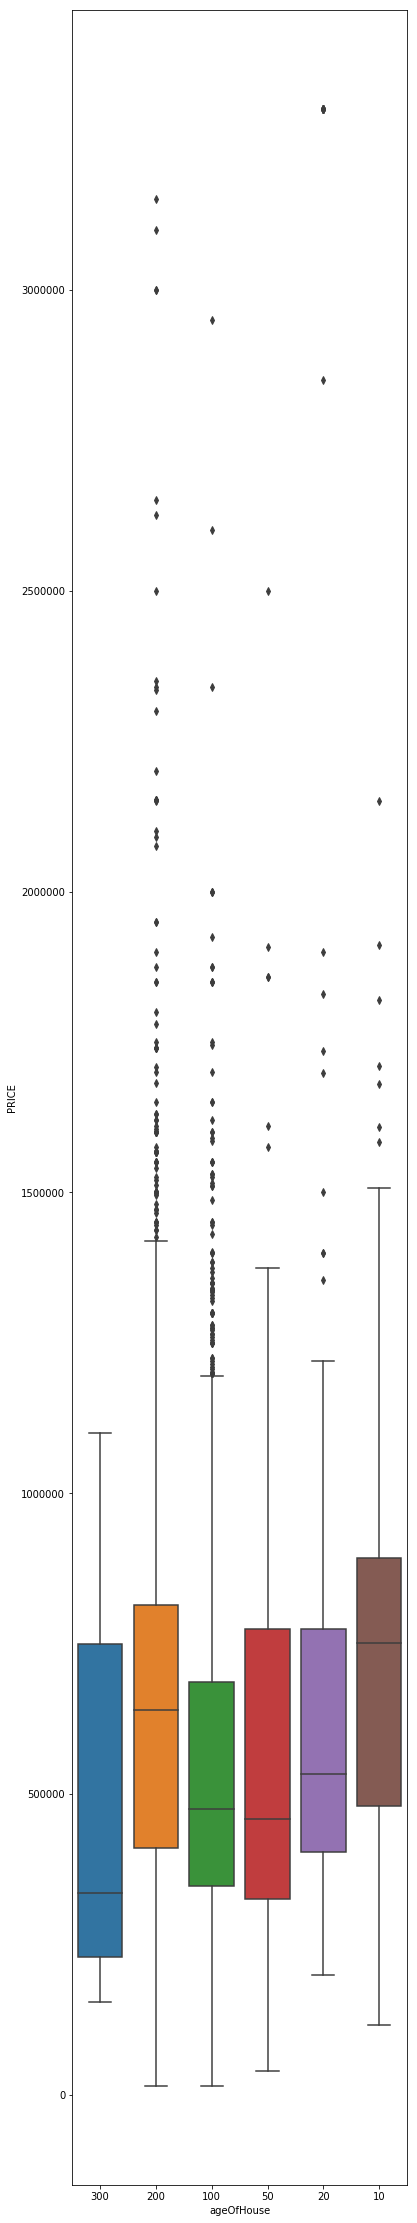

In [132]:
#box plot for Zipcode 20003

plt.subplots(figsize=(6,40))



#add a boxplot zipcode vs prices
sns.boxplot(x='ageOfHouse',y='PRICE',data=df_20003)

In [133]:
#Most expensive houses per Zipcode 20004
df_20003['PRICE'].max()

3300000.0

In [134]:
#least expensive house in 20004
df_20003['PRICE'].min()

15000.0

In [135]:
#Finding and getting rid of outliers
q1 = df_20003['PRICE'].quantile(.25)
q3 = df_20003['PRICE'].quantile(.75)
iqr = q3-q1
toprange = q3 + iqr * 1.5
botrange = q1 - iqr * 1.5

copydf_20003 = df_20003.copy()
copydf_20003 = df_20003.drop(copydf_20003[copydf_20003['PRICE'] > toprange].index)
copydf_20003 = copydf_20003.drop(copydf_20003[copydf_20003['PRICE'] < botrange].index)

copydf_20003.head()

,ZIPCODE,STORIES,AYB,YR_RMDL,CNDTN,BEDRM,BATHRM,HEAT,AC,PRICE,ageOfHouse
3308,20003.0,2.0,1900.0,NaN,Average,2,1,Hot Water Rad,N,335411.902778,200
3603,20003.0,2.0,1890.0,1992.0,Average,3,1,Hot Water Rad,N,345494.677966,200
3604,20003.0,2.0,1890.0,2007.0,Average,2,1,Forced Air,Y,309000.000000,200
3605,20003.0,2.0,1890.0,2012.0,Average,3,1,Hot Water Rad,Y,351000.000000,200
3606,20003.0,2.0,1890.0,2010.0,Good,3,2,Hot Water Rad,Y,399999.000000,200


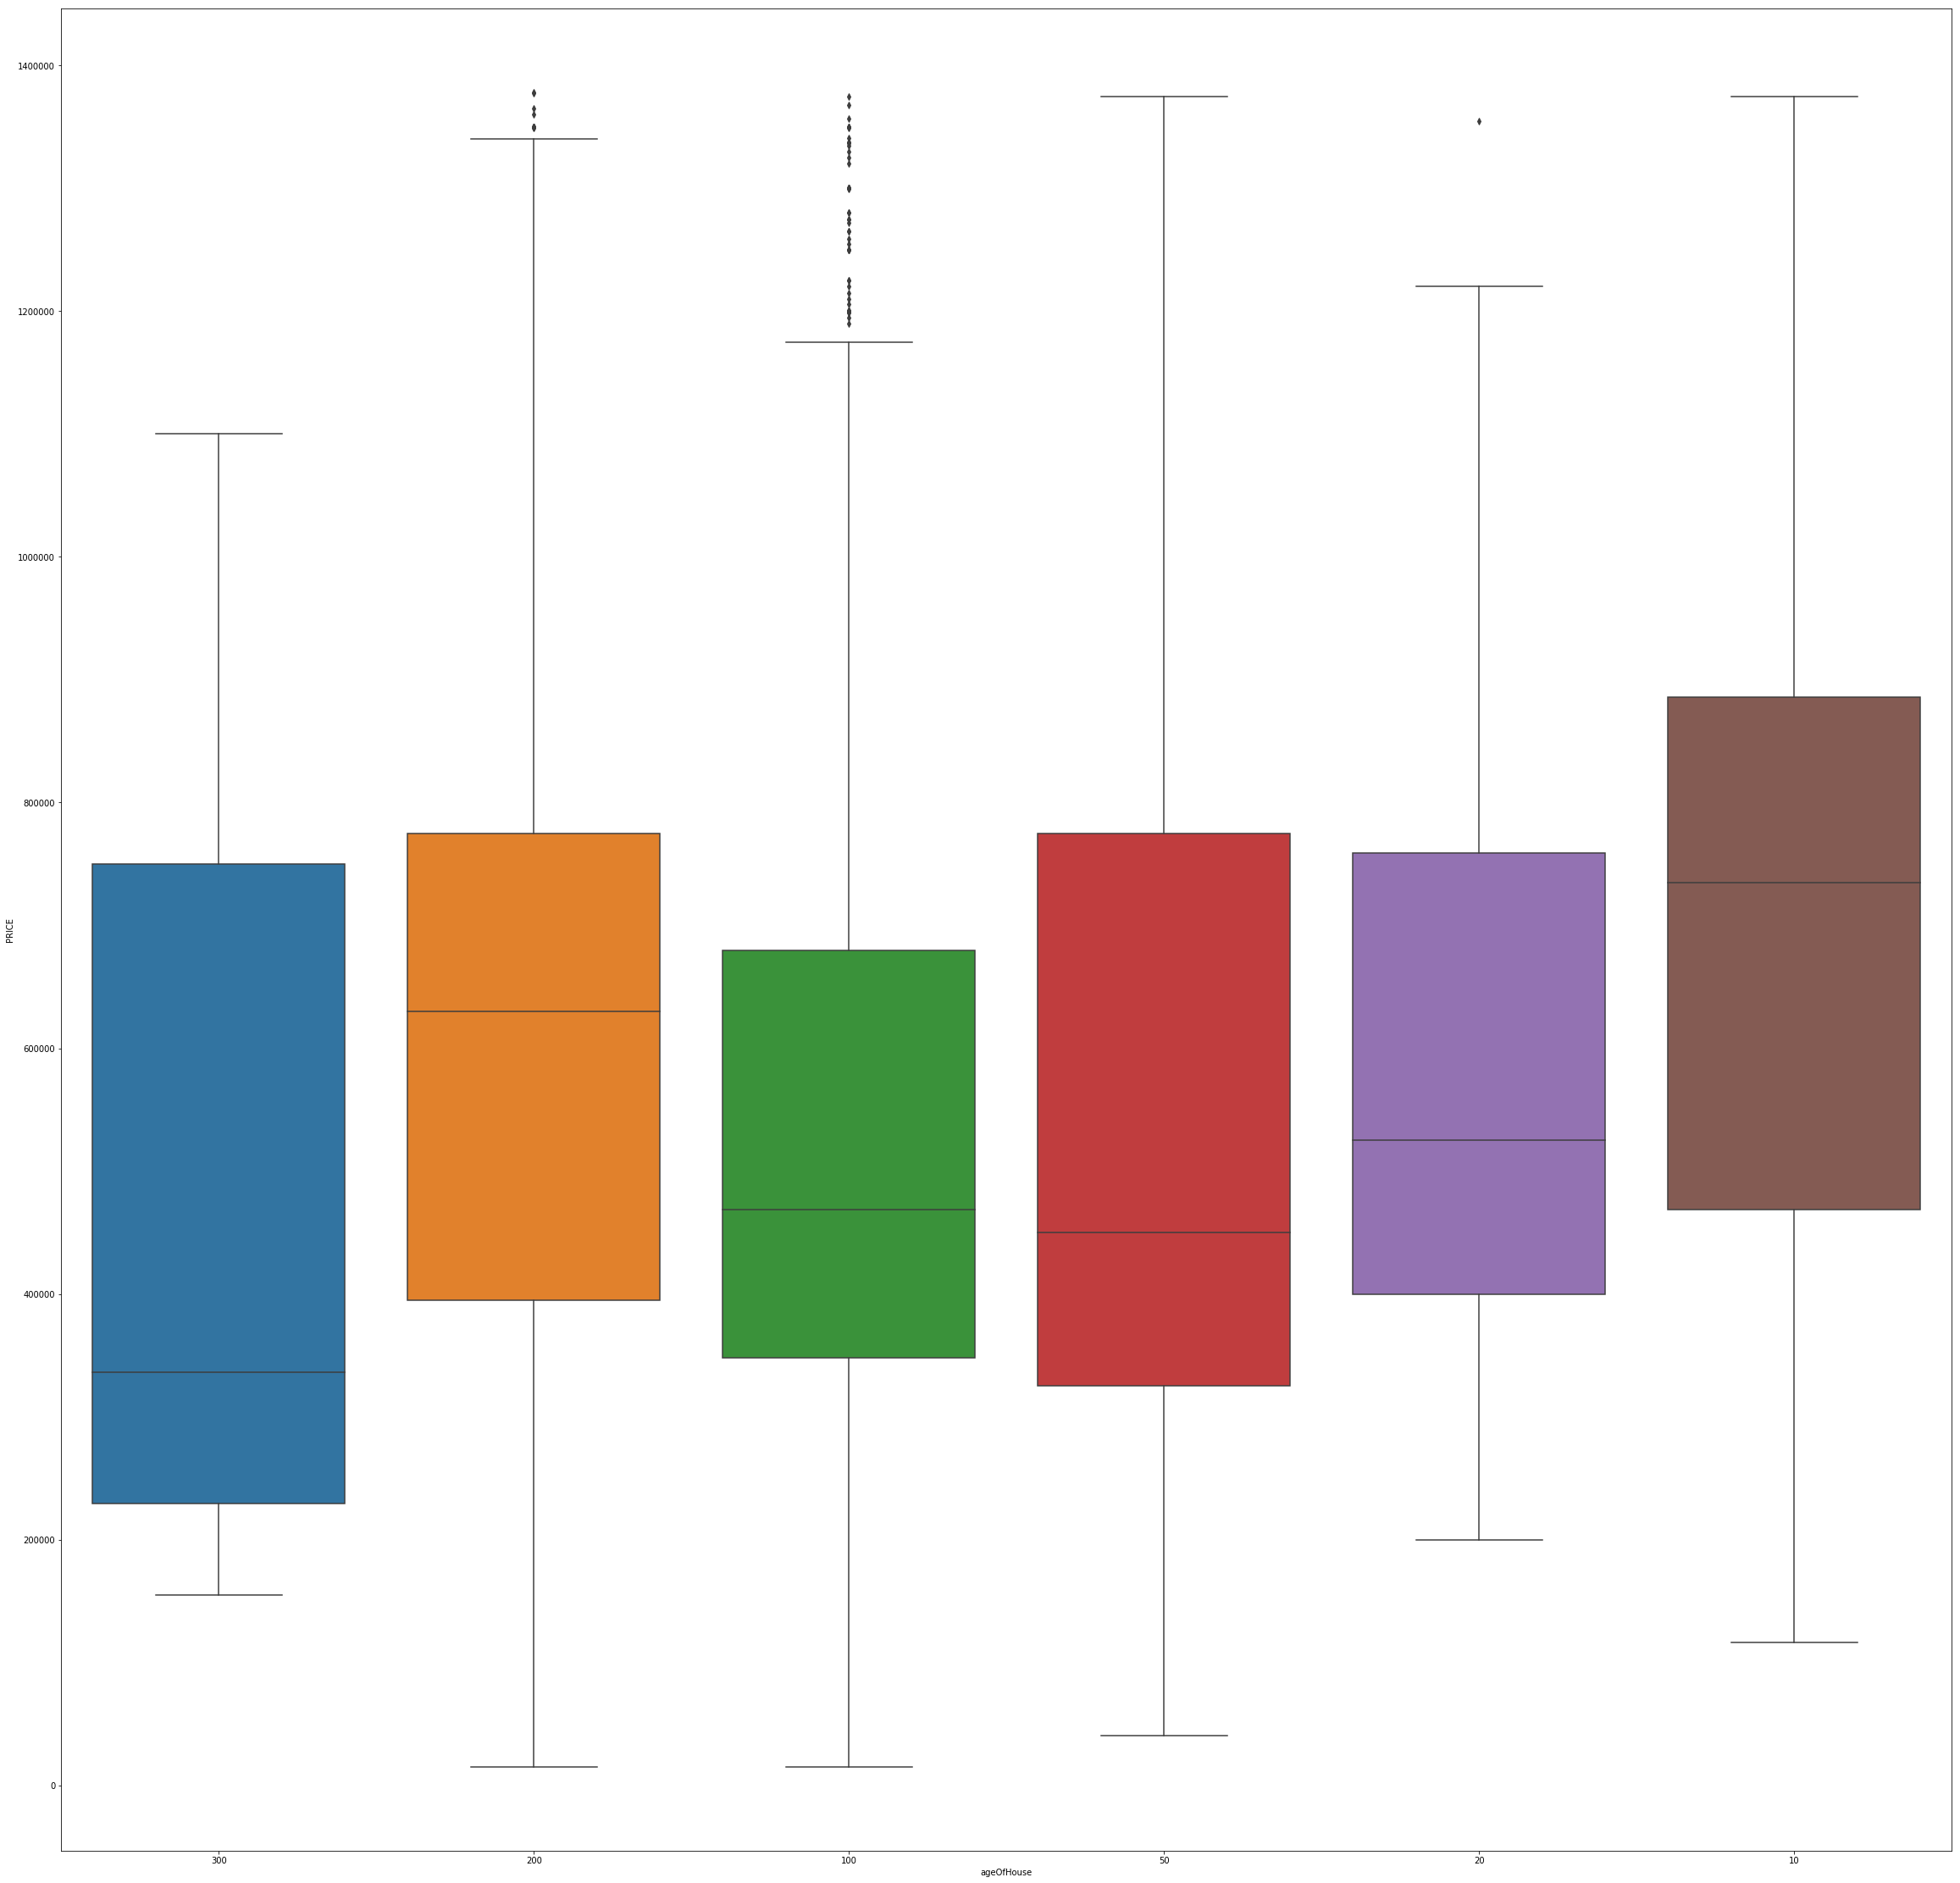

In [136]:
plt.subplots(figsize=(40, 40))
sns.boxplot(x='ageOfHouse',y='PRICE',data=copydf_20003)

In [137]:
#Find oldest house in 20003
df_20003['AYB'].min()

1776.0

In [138]:
#Find latest house in 20003
df_20003['AYB'].max()

2018.0

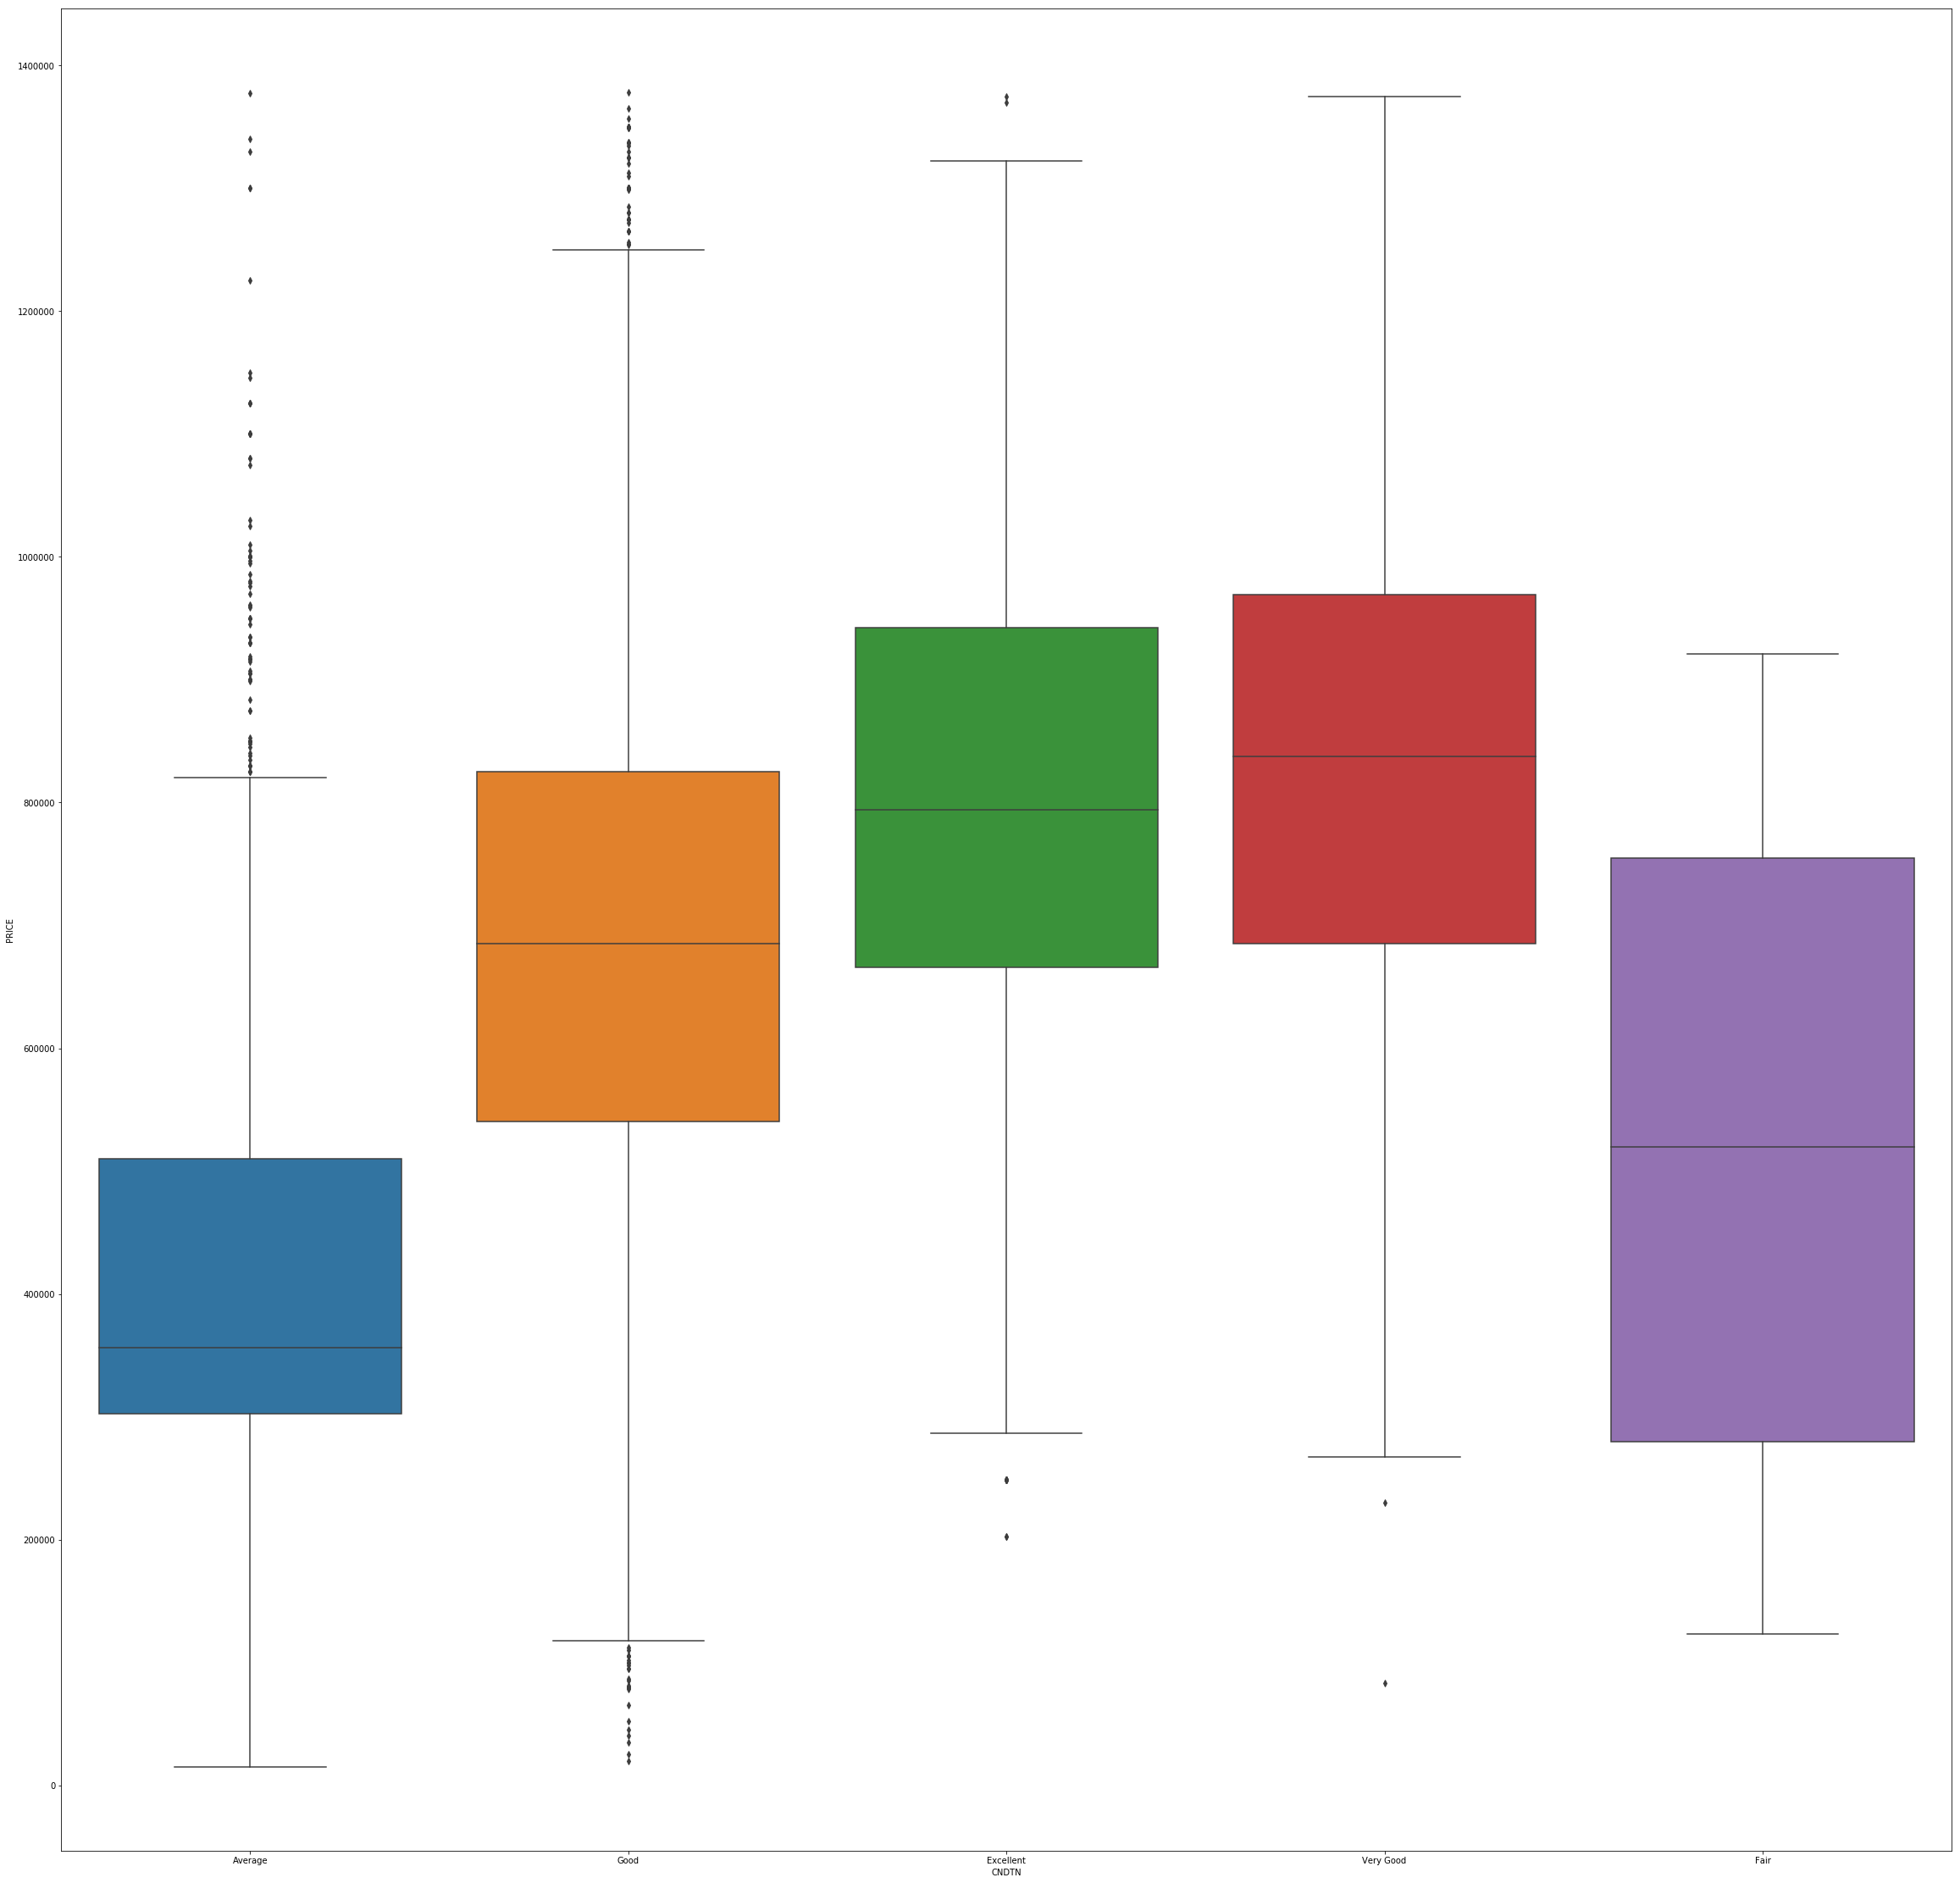

In [139]:
#boxplot highligthing Condition vs Price
plt.subplots(figsize=(40, 40))
sns.boxplot(x='CNDTN',y='PRICE',data=copydf_20003)

# Line Regression

In [140]:
from sklearn.linear_model import LinearRegression


In [141]:
#linearRegression is set to a variable
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [142]:
df_20003.head()

,ZIPCODE,STORIES,AYB,YR_RMDL,CNDTN,BEDRM,BATHRM,HEAT,AC,PRICE,ageOfHouse
3308,20003.0,2.0,1900.0,NaN,Average,2,1,Hot Water Rad,N,335411.902778,200
3603,20003.0,2.0,1890.0,1992.0,Average,3,1,Hot Water Rad,N,345494.677966,200
3604,20003.0,2.0,1890.0,2007.0,Average,2,1,Forced Air,Y,309000.000000,200
3605,20003.0,2.0,1890.0,2012.0,Average,3,1,Hot Water Rad,Y,351000.000000,200
3606,20003.0,2.0,1890.0,2010.0,Good,3,2,Hot Water Rad,Y,399999.000000,200


In [143]:

df_1=df_20003.drop('CNDTN', axis=1)
df_1.head()


,ZIPCODE,STORIES,AYB,YR_RMDL,BEDRM,BATHRM,HEAT,AC,PRICE,ageOfHouse
3308,20003.0,2.0,1900.0,NaN,2,1,Hot Water Rad,N,335411.902778,200
3603,20003.0,2.0,1890.0,1992.0,3,1,Hot Water Rad,N,345494.677966,200
3604,20003.0,2.0,1890.0,2007.0,2,1,Forced Air,Y,309000.000000,200
3605,20003.0,2.0,1890.0,2012.0,3,1,Hot Water Rad,Y,351000.000000,200
3606,20003.0,2.0,1890.0,2010.0,3,2,Hot Water Rad,Y,399999.000000,200


In [144]:
df_2=df_1.drop('HEAT', axis=1)
df_2.head()


,ZIPCODE,STORIES,AYB,YR_RMDL,BEDRM,BATHRM,AC,PRICE,ageOfHouse
3308,20003.0,2.0,1900.0,NaN,2,1,N,335411.902778,200
3603,20003.0,2.0,1890.0,1992.0,3,1,N,345494.677966,200
3604,20003.0,2.0,1890.0,2007.0,2,1,Y,309000.000000,200
3605,20003.0,2.0,1890.0,2012.0,3,1,Y,351000.000000,200
3606,20003.0,2.0,1890.0,2010.0,3,2,Y,399999.000000,200


In [145]:
df_3=df_2.drop('AC', axis=1)
df_3.head()


,ZIPCODE,STORIES,AYB,YR_RMDL,BEDRM,BATHRM,PRICE,ageOfHouse
3308,20003.0,2.0,1900.0,NaN,2,1,335411.902778,200
3603,20003.0,2.0,1890.0,1992.0,3,1,345494.677966,200
3604,20003.0,2.0,1890.0,2007.0,2,1,309000.000000,200
3605,20003.0,2.0,1890.0,2012.0,3,1,351000.000000,200
3606,20003.0,2.0,1890.0,2010.0,3,2,399999.000000,200


In [146]:
df_4=df_3.drop('ZIPCODE', axis=1)
df_4.head()

,STORIES,AYB,YR_RMDL,BEDRM,BATHRM,PRICE,ageOfHouse
3308,2.0,1900.0,NaN,2,1,335411.902778,200
3603,2.0,1890.0,1992.0,3,1,345494.677966,200
3604,2.0,1890.0,2007.0,2,1,309000.000000,200
3605,2.0,1890.0,2012.0,3,1,351000.000000,200
3606,2.0,1890.0,2010.0,3,2,399999.000000,200


In [147]:
df_5=df_4.drop('STORIES', axis=1)
df_5.head()

,AYB,YR_RMDL,BEDRM,BATHRM,PRICE,ageOfHouse
3308,1900.0,NaN,2,1,335411.902778,200
3603,1890.0,1992.0,3,1,345494.677966,200
3604,1890.0,2007.0,2,1,309000.000000,200
3605,1890.0,2012.0,3,1,351000.000000,200
3606,1890.0,2010.0,3,2,399999.000000,200


In [148]:
df_20003= df_5
df_20003.head()

,AYB,YR_RMDL,BEDRM,BATHRM,PRICE,ageOfHouse
3308,1900.0,NaN,2,1,335411.902778,200
3603,1890.0,1992.0,3,1,345494.677966,200
3604,1890.0,2007.0,2,1,309000.000000,200
3605,1890.0,2012.0,3,1,351000.000000,200
3606,1890.0,2010.0,3,2,399999.000000,200


In [156]:
#drop rows with any missing data
df_nm= df_20003.dropna()
df_nm 


,AYB,YR_RMDL,BEDRM,BATHRM,PRICE,ageOfHouse
3603,1890.0,1992.0,3,1,3.454947e+05,200
3604,1890.0,2007.0,2,1,3.090000e+05,200
3605,1890.0,2012.0,3,1,3.510000e+05,200
3606,1890.0,2010.0,3,2,3.999990e+05,200
3607,1905.0,1993.0,3,1,3.479418e+05,100
3639,1909.0,1976.0,3,1,3.479418e+05,100
3640,1890.0,2015.0,4,2,1.030000e+06,200
3641,1900.0,1966.0,4,2,1.006000e+06,200
3642,1908.0,2015.0,2,1,4.720000e+05,100
3643,1918.0,2006.0,4,3,1.174777e+06,100


In [158]:
X = df_nm.drop('PRICE', axis = 1)
lm.fit(X, df_nm.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [159]:
print('Estimated intercept coefficient:', lm.intercept_)

Estimated intercept coefficient: -7364503.470217549


In [160]:
print('Number of coefficients:', len(lm.coef_))

Number of coefficients: 5


In [161]:
pd.DataFrame(list(zip(X.columns, lm.coef_)), columns = ['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,AYB,-461.030094
1,YR_RMDL,4183.678602
2,BEDRM,48678.810535
3,BATHRM,134669.955269
4,ageOfHouse,832.074874


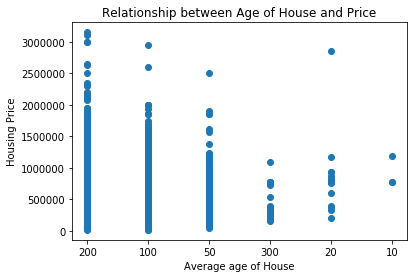

In [164]:
plt.scatter(df_nm.ageOfHouse, df_nm.PRICE) 
plt.xlabel("Average age of House") 
plt.ylabel("Housing Price") 
plt.title("Relationship between Age of House and Price") 
plt.show()

In [165]:
lm.predict(X)[0:5]

array([545158.78774286, 559235.15623522, 628832.35977905, 755134.95784404,
       459219.52751372])

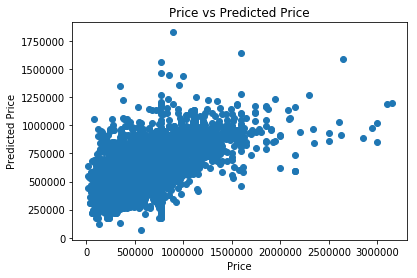

In [166]:
plt.scatter(df_nm.PRICE, lm.predict(X))
plt.xlabel("Price")
plt.ylabel("Predicted Price")
plt.title("Price vs Predicted Price")
plt.show()

In [167]:
#calculate mean squared error
mseFull = np.mean((df_nm.PRICE - lm.predict(X)) ** 2)
print(mseFull)

72532071617.59683


In [169]:
#test_size default = 0.25
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    X, df_nm.PRICE, test_size=0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(3418, 5)
(1684, 5)
(3418,)
(1684,)


In [170]:
lm=LinearRegression()
lm.fit(X_train, Y_train)
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

In [171]:
print ('Fit a model X_train, and calculate MSE with Y_train:', np.mean((Y_train - lm.predict(X_train)) ** 2))
print ('Fit a model X_train, and calculate MSE with X_test, Y_test:', np.mean((Y_test - lm.predict(X_test)) ** 2))

Fit a model X_train, and calculate MSE with Y_train: 73766225531.91374
Fit a model X_train, and calculate MSE with X_test, Y_test: 70229990884.54218


# Logistic Regression

In [174]:
#extract target variable
#make copy of 'Price' column
y = df_nm['PRICE']

In [188]:
#copy of df_20003 without 'PRICE' column
X =df_nm.drop(['PRICE'], axis=1)

In [189]:
#80% for training data, 20% for test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [192]:
#build logistic regression model
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

In [191]:
#accuracy score of model using training data
LogReg.score(X_train, y_train)

In [ ]:
#accuracy score of model using training data
LogReg.score(X_train, y_train)

In [ ]:
#generate prediction values
y_pred = LogReg.predict(X_test)

In [ ]:
#Confusion matrix shows which values model predicted correctly vs incorrectly

cm = pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted Not Survival', 'Predicted Survival'],
    index=['True Not Survival', 'True Survival']
)

cm

In [ ]:
#accuracy score of model on test data
LogReg.score(X_test, y_test)

In [ ]:
#from precision column, model is better at predicting passengers that do not survive
print(classification_report(y_test, y_pred))

# Building a Decision Tree

In [178]:
model = tree.DecisionTreeClassifier()

In [193]:
#develop model using training data
defining arguments in the model can help prevent overfitting
model.fit(X_train, y_train)

In [ ]:
#run the predictions on the test data
y_predict = model.predict(X_test)

In [ ]:
#check the accuracy of model
accuracy_score(y_test, y_predict)

In [ ]:
#look at true and false predictions
pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Predicted Not Survival', 'Predicted Survival'],
    index=['True Not Survival', 'True Survival']
)